In [103]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [104]:
import sklearn
import numpy as np
import re
import string
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def preprocess(corpus):
    # Create a set of stopwords
    stopwords_english = set(stopwords.words('english'))

    cleaned_corpus = []
    for text in corpus:
        # Lowercase
        text = text.lower()
        # Remove links
        text = re.sub(r'https?://[^\s\n\r]+', '', text)
        # Remove punctuation
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        # Remove words containing numbers
        text = re.sub(r'\w*\d\w*', '', text)
        # Tokenize and remove stopwords
        words = text.split()
        words = [word for word in words if word not in stopwords_english]
        cleaned_corpus.append(' '.join(words))
    return cleaned_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amreshsenathirajah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
# from keras.layers import Embedding, GRU, Dense, Dropout, Conv1D
# from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, SimpleRNN, Dense, Dropout
# # Preprocess the text
# X = preprocess(train['comment_text'])
# y = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

# # Tokenize text, convert text data into numbers
# max_words = 20000
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(X)
# X_seq = tokenizer.texts_to_sequences(X)

# # Pad sequences
# max_length = 200
# X_padded = pad_sequences(X_seq, maxlen=max_length)

# # Split the data
# X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.2, random_state=42)



# # Build GRU model
# embedding_dim = 100
# filters = 64 # number of features model will learn
# kernel_size = 3 # 3by3 matrix
# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
# model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
# model.add(GRU(100))  
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5 , seed = 1))
# model.add(Dense(6, activation='softmax'))

# custom_optimizer = Adam(learning_rate=0.001)
# model.compile(loss='binary_crossentropy', 
#               optimizer=custom_optimizer, 
#               metrics=['accuracy', 
#                        tf.keras.metrics.Precision(), 
#                        tf.keras.metrics.Recall(), 
#                        tf.keras.metrics.AUC(name='auc-roc')])




In [107]:
X = train['comment_text']
y = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [108]:
samples = 10000

toxic_indices = y[y['toxic'] == 1].index
random_toxic_indices = np.random.choice(toxic_indices, samples, replace=True)
non_toxic_indices = y[y['toxic'] == 0].index
random_non_toxic_indices = np.random.choice(non_toxic_indices, samples, replace=True)


severe_toxic_indices = y[y['severe_toxic'] == 1].index
random_severe_toxic_indices = np.random.choice(severe_toxic_indices, samples, replace=True)
non_severe_toxic_indices = y[y['toxic'] == 0].index
random_non_severe_toxic_indices = np.random.choice(non_toxic_indices, samples, replace=True)


obscene_indices = y[y['obscene'] == 1].index
random_obscene_indices = np.random.choice(obscene_indices, samples, replace=True)
non_obscene_indices = y[y['toxic'] == 0].index
random_non_obscene_indices = np.random.choice(non_toxic_indices, samples, replace=True)


threat_indices = y[y['threat'] == 1].index
random_threat_indices = np.random.choice(threat_indices, samples, replace=True)
non_threat_indices = y[y['toxic'] == 0].index
random_non_threat_indices = np.random.choice(non_toxic_indices, samples, replace=True)

insult_indices = y[y['insult'] == 1].index
random_insult_indices = np.random.choice(insult_indices, samples, replace=True)
non_insult_indices = y[y['toxic'] == 0].index
random_non_insult_indices = np.random.choice(non_toxic_indices, samples, replace=True)

identity_hate_indices = y[y['identity_hate'] == 1].index
random_identity_hate_indices = np.random.choice(identity_hate_indices, samples, replace=True)
non_identity_hate_indices = y[y['toxic'] == 0].index
random_non_identity_hate_indices = np.random.choice(non_toxic_indices, samples, replace=True)

new_indices = np.concatenate([
    random_toxic_indices,
    random_severe_toxic_indices,
    random_obscene_indices,
    random_threat_indices,
    random_insult_indices,
    random_identity_hate_indices,
    random_non_toxic_indices,
    random_non_severe_toxic_indices,
    random_non_obscene_indices,
    random_non_threat_indices,
    random_non_insult_indices,
    random_non_identity_hate_indices
])

# Subset the data with resampled indices
X_sampled = X[new_indices]
y_sampled = y.iloc[new_indices]



In [113]:
from keras.layers import Embedding, GRU, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import tensorflow as tf

# Tokenize text, convert text data into numbers
max_words = 20000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_sampled)
X_seq = tokenizer.texts_to_sequences(X_sampled)
max_length = 200
X_padded = pad_sequences(X_seq, maxlen=max_length)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_padded, y_sampled, test_size=0.2, random_state=42)


# Build GRU model without Conv1D
embedding_dim = 100
units = 100  # You can adjust the number of GRU units based on your needs

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
model.add(GRU(units, activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5, seed=1))
model.add(Dense(6, activation='softmax'))

custom_optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', 
              optimizer=custom_optimizer, 
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall(), 
                       tf.keras.metrics.AUC(name='auc-roc')])


In [114]:
# Train the model
batch_num = 128
epochs = 5
opt = model.fit(X_train, y_train, batch_size=batch_num, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/5
750/750 [==============================] - 131s 173ms/step - loss: 0.2307 - accuracy: 0.8227 - precision_2: 0.5367 - recall_2: 0.2276 - auc-roc: 0.6352 - val_loss: 0.1370 - val_accuracy: 0.9522 - val_precision_2: 0.4876 - val_recall_2: 0.2853 - val_auc-roc: 0.6319
Epoch 2/5
750/750 [==============================] - 137s 182ms/step - loss: 0.1075 - accuracy: 0.8910 - precision_2: 0.4908 - recall_2: 0.2785 - auc-roc: 0.6538 - val_loss: 0.0851 - val_accuracy: 0.9355 - val_precision_2: 0.4875 - val_recall_2: 0.2819 - val_auc-roc: 0.6798
Epoch 3/5
750/750 [==============================] - 139s 185ms/step - loss: 0.0723 - accuracy: 0.8497 - precision_2: 0.4798 - recall_2: 0.2745 - auc-roc: 0.6923 - val_loss: 0.0669 - val_accuracy: 0.9122 - val_precision_2: 0.4864 - val_recall_2: 0.2774 - val_auc-roc: 0.7034
Epoch 4/5
750/750 [==============================] - 138s 184ms/step - loss: 0.0533 - accuracy: 0.8151 - precision_2: 0.4841 - recall_2: 0.2818 - auc-roc: 0.6951 - val_loss: 0

In [115]:
# # Evaluate the model
# loss, accuracy = model.evaluate(X_val, y_val)
# print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

In [73]:
# Make predictions on test data
test = pd.read_csv('test.csv')
clean_test_comments = preprocess(test['comment_text'])
X_test_seq = tokenizer.texts_to_sequences(clean_test_comments)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length)


In [116]:
predictions = model.predict(X_test_padded)
# Create a submission file
subm = pd.read_csv('sample_submission.csv')
subm[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] = predictions
subm.to_csv('rnn_submission.csv', index=False)


4787/4787 [==============================] - 103s 22ms/step


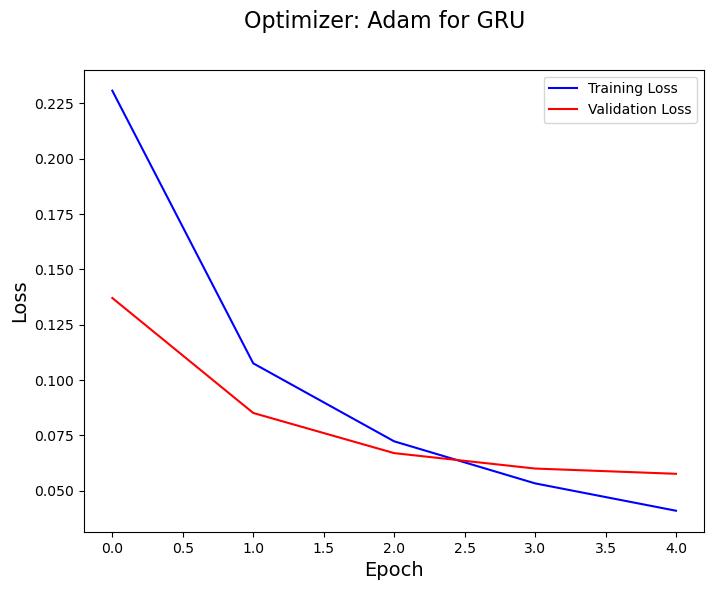

In [117]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.suptitle('Optimizer: Adam for GRU', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.plot(opt.history['loss'], color='b', label='Training Loss')
plt.plot(opt.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.show()